In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [86]:
# Load the Titanic dataset
data = pd.read_csv("titanic.csv")

In [87]:
# Preprocessing
df = data.copy()
df['Sex'] = df['Sex'].replace({'male': 1, 'female': 2})
df['Embarked'] = df['Embarked'].fillna('S')  # Fill missing values with 'S'
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [88]:
# Fill missing values in Age and Fare with their means
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [89]:
# Feature scaling
scaler = StandardScaler()
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']
df[features] = scaler.fit_transform(df[features])

In [90]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,0.873482,"Kelly, Mr. James",-0.755929,0.334993,-0.499470,-0.400248,330911,-0.498407,NaN,2.243165
1,893,1,0.873482,"Wilkes, Mrs. James (Ellen Needs)",1.322876,1.325530,0.616992,-0.400248,363272,-0.513274,NaN,-0.677841
2,894,0,-0.315819,"Myles, Mr. Thomas Francis",-0.755929,2.514175,-0.499470,-0.400248,240276,-0.465088,NaN,2.243165
3,895,0,0.873482,"Wirz, Mr. Albert",-0.755929,-0.259330,-0.499470,-0.400248,315154,-0.483466,NaN,-0.677841
4,896,1,0.873482,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1.322876,-0.655545,0.616992,0.619896,3101298,-0.418471,NaN,-0.677841


In [91]:
# Split the data into training and testing sets
X = df[features].values
y = df['Survived'].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [93]:
# Initialize weights and bias with small random values
np.random.seed(0)
w = np.random.randn(x_train.shape[1])
b = np.random.randn()

In [94]:
# Gradient Descent
def gradientDescent(X, y, w, b, lr, itr):
    J_history = []
    
    for i in range(itr):
        z = np.dot(X, w) + b
        y_hat = sigmoid(z)
        error = y_hat - y
        dw = np.dot(X.T, error) / len(X)
        db = np.sum(error) / len(X)
        
        w -= lr * dw
        b -= lr * db
        
        cost = -1 / len(X) * (np.dot(y.T, np.log(y_hat)) + np.dot((1 - y).T, np.log(1 - y_hat)))
        J_history.append(cost)
        
        if i % (itr // 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost:.5f} ")

    return w, b, J_history

## Evaluating Training Data

Iteration    0: Cost 0.00072 
Iteration 10000: Cost 0.00069 
Iteration 20000: Cost 0.00067 
Iteration 30000: Cost 0.00065 
Iteration 40000: Cost 0.00064 
Iteration 50000: Cost 0.00062 
Iteration 60000: Cost 0.00061 
Iteration 70000: Cost 0.00060 
Iteration 80000: Cost 0.00059 
Iteration 90000: Cost 0.00058 


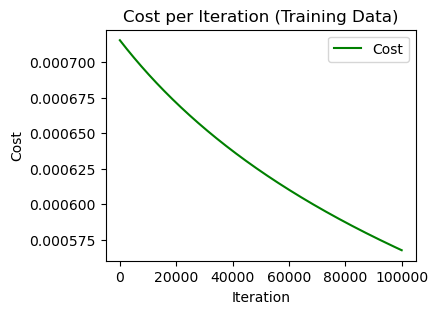

In [113]:
# Learning rate and iterations
lr = 0.001
iterations = 100000
w_final, b_final, J_hist = gradientDescent(x_train, y_train, w, b, lr, iterations)
# Plot the loss
plt.figure(figsize=(4, 3))
plt.plot(range(iterations), J_hist, label='Cost', color='green')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost per Iteration (Training Data)')

plt.show()
# plt.figure(figsize=(4, 3))
# plt.plot(cf)
# plt.xlabel('Iteration')
# plt.ylabel('Cost')
# plt.title('Cost vs. Iteration')
# plt.show()

In [115]:
y_train_predicted = np.dot(x_train, w_final) + b_final
y_predTr = [1 if x >= 0.5 else 0 for x in y_train_predicted]
df1 = pd.DataFrame({'Actual Price': y_train, 'Predicted Price':y_predTr})
df1

,Actual Price,Predicted Price
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
329,0,0
330,0,0
331,0,0
332,0,0


In [121]:
# Calculate the mean of the actual values
mean_actual = np.mean(y_train)
# Calculate the total sum of squares (SST)
sst = np.sum((y_train - mean_actual) ** 2)
# Calculate the sum of squared residuals (SSR)
ssr = np.sum((y_predTr - y_train) ** 2)
# Calculate R-squared
r_squared = 1 - (ssr / sst)
print(f"R-squared (Training Data): {r_squared:.3f}")

R-squared (Training Data): 1.000


## Evaluating Testing Data

Iteration    0: Cost 0.00047 
Iteration 10000: Cost 0.00044 
Iteration 20000: Cost 0.00041 
Iteration 30000: Cost 0.00039 
Iteration 40000: Cost 0.00036 
Iteration 50000: Cost 0.00034 
Iteration 60000: Cost 0.00033 
Iteration 70000: Cost 0.00031 
Iteration 80000: Cost 0.00030 
Iteration 90000: Cost 0.00028 


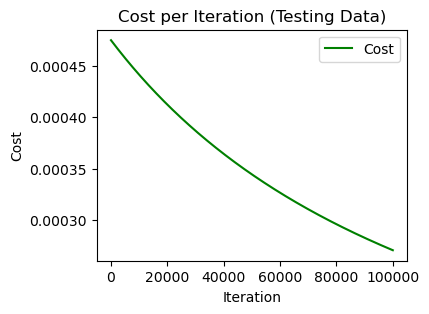

In [108]:
# Learning rate and iterations
lr = 0.01
iterations = 100000
w_final, b_final, J_hist = gradientDescent(x_test, y_test, w, b, lr, iterations)
# Plot the loss
plt.figure(figsize=(4, 3))
plt.plot(range(iterations), J_hist, label='Cost', color='green')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost per Iteration (Testing Data)')

plt.show()

In [110]:
y_test_predicted = np.dot(x_test, w_final) + b_final
y_predT = [1 if x >= 0.5 else 0 for x in y_test_predicted]
df2 = pd.DataFrame({'Actual Price': y_test, 'Predicted Price':y_predT})
df2

,Actual Price,Predicted Price
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
79,0,0
80,0,0
81,1,1
82,0,0


In [120]:
# Calculate the mean of the actual values
mean_actual = np.mean(y_test)
# Calculate the total sum of squares (SST)
sst = np.sum((y_test - mean_actual) ** 2)
# Calculate the sum of squared residuals (SSR)
ssr = np.sum((y_predT - y_test) ** 2)
# Calculate R-squared
r_squared = 1 - (ssr / sst)
print(f"R-squared (Testing Data): {r_squared:.3f}")


R-squared (Testing Data): 1.000
